# Fakultät für Physik

## Physikalisches Praktikum P2 für Studierende der Physik

Versuch P2-33, 34, 35 (Stand: April 2024)

[Raum F1-08](https://labs.physik.kit.edu/img/Praktikum/Lageplan_P2.png)



# Spezifische Wärmekapazität

Name: __________________ Vorname: __________________ E-Mail: __________________

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Name: __________________ Vorname: __________________ E-Mail: __________________

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: _____

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}


Betreuer: __________________

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Versuch durchgeführt am: __________________

---

**Beanstandungen zu Protokoll Version _____:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Testat: __________________

# Durchführung

**Die Anleitung zu diesem Versuch finden Sie [hier](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Spezifische_Waermekapazitaet/README.md).**

In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import kafe2
import scipy.constants as sc
import uncertainties as u
import uncertainties.unumpy as up



## Aufgabe 1: Spezifische Wärmekapazität aus Mischtemperatur

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Spezifische_Waermekapazitaet/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Bestimmen Sie so genau wie mit den verfügbaren Mitteln möglich, die spezifische Wärmekapazität $c_{X}$ von Aluminium und noch eines weiteren Metalls, durch das Herstellen von Mischtemperaturen in einem Glas-Kalorimeter. 
 * Bearbeiten Sie hierzu die folgenden Aufgaben.

### Aufgabe 1.1: Planung des Messvorhabens

 * Beschreiben Sie das von Ihnen geplante Messvorhaben und den dazu verwendeten Aufgbau in eigenen Worten.
 * Führen Sie ggf. geeignete Vergleichs- und Kalibrationsmessreihen durch, um sich von der Eignung der Methode zu überzeugen oder Korrekturen oder Unsicherheiten abzuschätzen. 

---




**Geplantes Messvorhaben:**

Das Granulat wird in einem kochenden Wasserbad auf $\sim 100°C$ erwärmt und in das Wasserbad, welches sich auf Raumtemperatur befindet, geschüttet. Granulat wird verwendet da es seine Temperatur besonders schnell an das Wasser abgibt. Der Nachteil ist dass es auch an der Umgebungsluft schnell an Temperatur verliert. Deswegen muss schnell gearbeitet werden. 

Es wird kaltes Wasser verwendet da diese so zunächst keine Temperatur an die Umgebungsluft abgibt. Wasser stellt dabei durch seine hohe spezifische Wärmekapazität und allgemeine Verfügbarkeit eine geeignete Flüssigkeit dar. Es sollte darauf geeignet werden, dass die Anfangs und dendtemperaturen nicht zu nahe beeinander liegen um eine einfachere Messung zu ermöglichen. Jedoch sollen sie sich auch nicht zu sehr unterscheiden da die Wärmekapazität nur annähernd konstant ist. 

Durch die große Oberfläche des Granulats, gibt dieses seine Temperatur sehr schnell an das Wasser ab, sodass sie nach kurzer Zeit auf der nährungsweise selben Temperatur sind. Es stellt sich im Gefäß also eine höhere Temperatur als zuvor ein.

Dabei wird die Temperatur und die Masse des Wassers davor sowie danach und die Masse des Granulats gemessen. Aus der Differenz $m_{\rm{dannach}}-m_{\rm{davor}}-m_{\rm{granulat}}=m_{\rm{Wasser,100°C}}$ kann so er Fahler auf das anhaftende Wasser reduziert werden.

Da im Gefäß immer noch etwas Wasser aus der letzten Messung verbleibt wird der Fehler auf die Massenmessung auf $1\,g$ geschätzt. Das ergibt sich aus der Differenz des Leergewichts am Anfang zu späteren Messungen des leeren Gefäßes. 

Die Messungen mit dem Metall kann ohne Deckel vorgenommen werden da der Temperaturgradient gering ist. Bei der Kalibration jedoch ist der Temperaturgradient deutlich größer und so muss der Deckel aufgesetzt werden. Die Temperatur wird mit einem Thermometer mit möglichst geringer Wärmekapazität erhoben um das Ergebnis nicht zu verfälschen. Es könnte eine kontinuierliche Messung durchgeführt werden um so den Wärmeverlust abzuschätzen, wurde in diesem Fall jedoch nicht durchgeführt. Bei der Messung ist darauf zu achten dass das Wasser umgerührt, bzw. der Behälter bewegt wird um eine uniforme Erwärmung zu erreichen. 

Aus der Energieerhaltung wissen wir das im adiabtischen Falle gilt:

$E_{term} = m_w T_w c_w + m_m T_m c_m := const.$

also auch:

$m_w T_w c_w + T_m( m_m c_m + m_{\rm{w,bad}}  c_w) + C_{\rm{Gefäß}}T_w= T_n (m_m  c_m + (m_w+ m_{\rm{w,bad}}) c_w +C_{\rm{Gefäß}})$   ; mit der neuen Temperatur $T_n$

Das Umstellen nach $c_m$ liefert:
$$
c_m = \frac{c_w((m_{\rm{w,bad}})(T_m-T_n)+m_w(T_w-Tn))+C_{\rm{Gefäß}}(T_w-T_n)}{(T_n-T_m)m_m}
$$

Für die Wärmekapazität des Gefäßes gilt
$$(T_{\rm{koch}}m_{\rm{koch}}+T_{\rm{raum}}m_{\rm{raum}})c_w+T_{\rm{raum}}C_{\rm{Gefäß}}=T_n(c_w(m_{\rm{koch}}+m_{\rm{raum}})+C_{\rm{Gefäß}})\Rightarrow C_{\rm{Gefäß}}=c_w\frac{(T_{\rm{koch}}m_{\rm{koch}}+T_{\rm{raum}}m_{\rm{raum}}) - T_n (m_{\rm{raum}}+m_{\rm{koch}})}{T_n-T_{\rm{raum}}}$$



### Aufgabe 1.2: Durchführung des Messprogramms und Auswertung

 * Führen Sie eine Messreihe geeigneter Länge für Aluminium und ein weiteres Metall Ihrer Wahl durch.  

 * Bestimmen Sie für Ihre Auswertung Unsicherheiten auf alle Parameter, die die Messung Ihrer Meinung nach beeinflussen können, pflanzen Sie diese auf das Ergebnis fort und vergleichen Sie mit der Erwartung.

---

Es wird $c_{\rm{Wasser}}=4190\frac{J}{kg\,K}$ bei $300\,K$ verwendet.  [Quelle](https://www.leifiphysik.de/waermelehre/innere-energie-waermekapazitaet/grundwissen/spezifische-waermekapazitaet)

In [13]:
kalorimeter_ohne_deckel = 0.4806
g_wasser_raumtemp = up.uarray([0.14162,0.16116,0.05395],0.001)
g_wasser_insgesamt = up.uarray([0.2535,0.23827,0.222],0.001)
T = up.uarray([79.5,66.8,128.3],0.1)
raumtemp = u.ufloat(23.1,0.3)
T_m=100
c_w=4190



def C(Tw,Tn,m_w,m_m,m_wbad=0,C_beh=0):
    return c_w*(Tw*m_w-Tn*(m_w+m_wbad)+T_m*m_wbad)/((Tn-T_m)*m_m) + C_beh*(T_m-Tn)/((Tn-T_m)*m_m) 


def C(T_w,T_n,m_w,m_m,m_wbad=0,C_beh=0):
    return (c_w*((T_m-T_n)*m_wbad+m_w*(T_w-T_n)) +C_beh*(T_w-T_n))/((Tn-T_m)*m_m) 


def C_Gefäss(T_r,Tn,m_r,m_k):
    return c_w*((T_m*m_k+T_r*m_r)-Tn*(m_r+m_k))/(Tn-T_r)

Tn=32
Tw=24
m_m=0.032
C_Gefäss(raumtemp,T,g_wasser_raumtemp,g_wasser_insgesamt-g_wasser_raumtemp)

array([-422.99892411347514+/-6.087944188903313,
       -429.80003661327214+/-8.30843386550485,
       -415.4693673954372+/-3.344047281872515], dtype=object)

Da bei Temperaturmessung bei der Kalibrierungsmessung das Thermometer falsche Werte ausgab muss als Wert für die Wärmekapazität auf den Wert einer anderen Gruppe zurückgegriffen werden $C=85\frac{J}{K}$. Wir ehalten mit  $T_n=128°C$  eine negative Wärmekapazität. Die erste Messreihe muss aufgrund der mangelhaften Vorgehensweise verworfen werden.

In [34]:
#Außentemp 26.9°C
#GAlu = 0.03912
AluWasser = np.array([0.15483,0.15482,0.15287,0.15121,0.13345])
GAlu = AluWasser-0.15483
AluWassermitAludrinnen = np.array([0.1975,0.19503,0.192,0.17555])


Gewichtdanach = np.array([0.19443])
Tdavor=up.uarray([27.8,30.2,33.5,36.4,27.1],0)
TAlu = up.uarray([30.5,33.8,38.1,39.3,32.2],0)



#m alu2 31g

m_in = up.uarray([71.67, 102.34, 79.53],1)*1e-3
t_in = up.uarray([24.7, 25.2, 25.1],0.2)
m_aus = up.uarray([105.89, 135.76, 113.68],1)*1e-3
t_aus = up.uarray([32.6, 30.6, 32.3],0.2)
m_w2=m_aus-m_in-m_m
m_m=0.031
np.mean(C(t_in,t_aus,m_in,m_m,m_w2,85))


999.8524130297283+/-121.3900120635953

In [15]:
#Kupfergewicht 86.55
m_m=86.55*1e-3
t_init = up.uarray([27.6, 27.4, 24.1, 24.2,24.5, 24.7],0.2)
t_aus = up.uarray([31.6, 33.0, 30.8, 31.7, 29.4, 33.1],0.3)
m_init = up.uarray([137.56, 108.83, 103.36, 90.78, 159.51, 79.38],1)*1e-3
m_aus = up.uarray([227.81, 198.36, 193.58, 180.29, 249.58,169.34],1)*1e-3
m_aus-m_init
m_w2=m_aus-m_init-m_m

np.mean(C(t_init,t_aus,m_init,m_m,m_w2,85))

397.32327227829245+/-32.80942055480017

Es ergibt sich $c_{\rm{Alu}}=999.85\pm121.39\,\frac{J}{Kg\,K}$ und $c_{\rm{Kupfer}}=397.32\pm32.81\,\frac{J}{Kg\,K}$. In Vergleich mit den tatsächlichen Werten $c_{\rm{Alu}}=0.896\,\frac{J}{g\,K}$, $c_{\rm{Kupfer}}=0.381\,\frac{J}{g\,K}$  [[Quelle]](https://www.chemie.de/lexikon/Liste_der_spezifischen_W%C3%A4rmekapazit%C3%A4ten.html), so ist zu sehen, dass die Werte, besonders der für Kupfer,  eine recht kleine Abweichung haben und im Ramen der Unsicherheit übereinstimmen.  

## Aufgabe 2: Spezifische Wärmekapazität von Aluminium als Funktion der Temperatur

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Spezifische_Waermekapazitaet/doc/Hinweise-Versuchsdurchfuehrung.md).**

 * Messen Sie $c_{\mathrm{Al}}(T)$ in Abhängigkeit von der Temperatur in einem Bereich zwischen $T=100-300\,\mathrm{K}$. 
 * Bearbeiten Sie hierzu die folgenden Aufgaben.

### Aufgabe 2.1: Datennahme

 * Beschreiben Sie das VOrgehen in eigenen Worten. 
 * Bereiten Sie die Datennahme vor, nehmen Sie die Messpunkte auf.

---

**Lösung:**

*Fügen Sie Ihre Lösung zu dieser Aufgabe hier ein. Löschen Sie hierzu diesen kursiv gestellten Text aus dem Dokument. Um Code-Fragmente und Skripte in [Python](https://www.python.org/), sowie ggf. bildliche Darstellungen direkt ins [Jupyter notebook](https://jupyter.org/) einzubinden fügen Sie dem notebook eine Code-Zelle zu.* 

---

In [16]:
P = [[10.1,1.94],[10.0,1.82],[10.1,1.95],[]]

### Aufgabe 2.2: Kalibration des Thermoelements

 * Kalibrieren Sie das $\mathrm{NiCr}$-$\mathrm{Ni}$-Thermoelement von ursprünglichen Angabe von Volt auf eine Temperaturmessung in Kelvin. 
 * Sie können diese Kalibration mit Hilfe der Datei [calibration.csv](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Spezifische_Waermekapazitaet/params/calibration.csv) vornehmen. 

---

Wir entscheiden uns hier gegen einen Fit, und sparen uns damit eine Abstraktionsebene. Für jeden Wert von U, für welchen wir die Temperatur bestimmen wollen, finden wir zuerst den Messwert für die Temperatur direkt darunter ($U_i$), und direkt darüber ($U_{i+1}$).

Durch diese beiden Werte ziehen wir eine Augleichsgerade, und lesen die Temperatur für den gesuchten Wert von U aus.

$T(U) = T_i + (T_{i+1}-T_i)\frac{U-U_i}{U_{i+1}-U_i}$





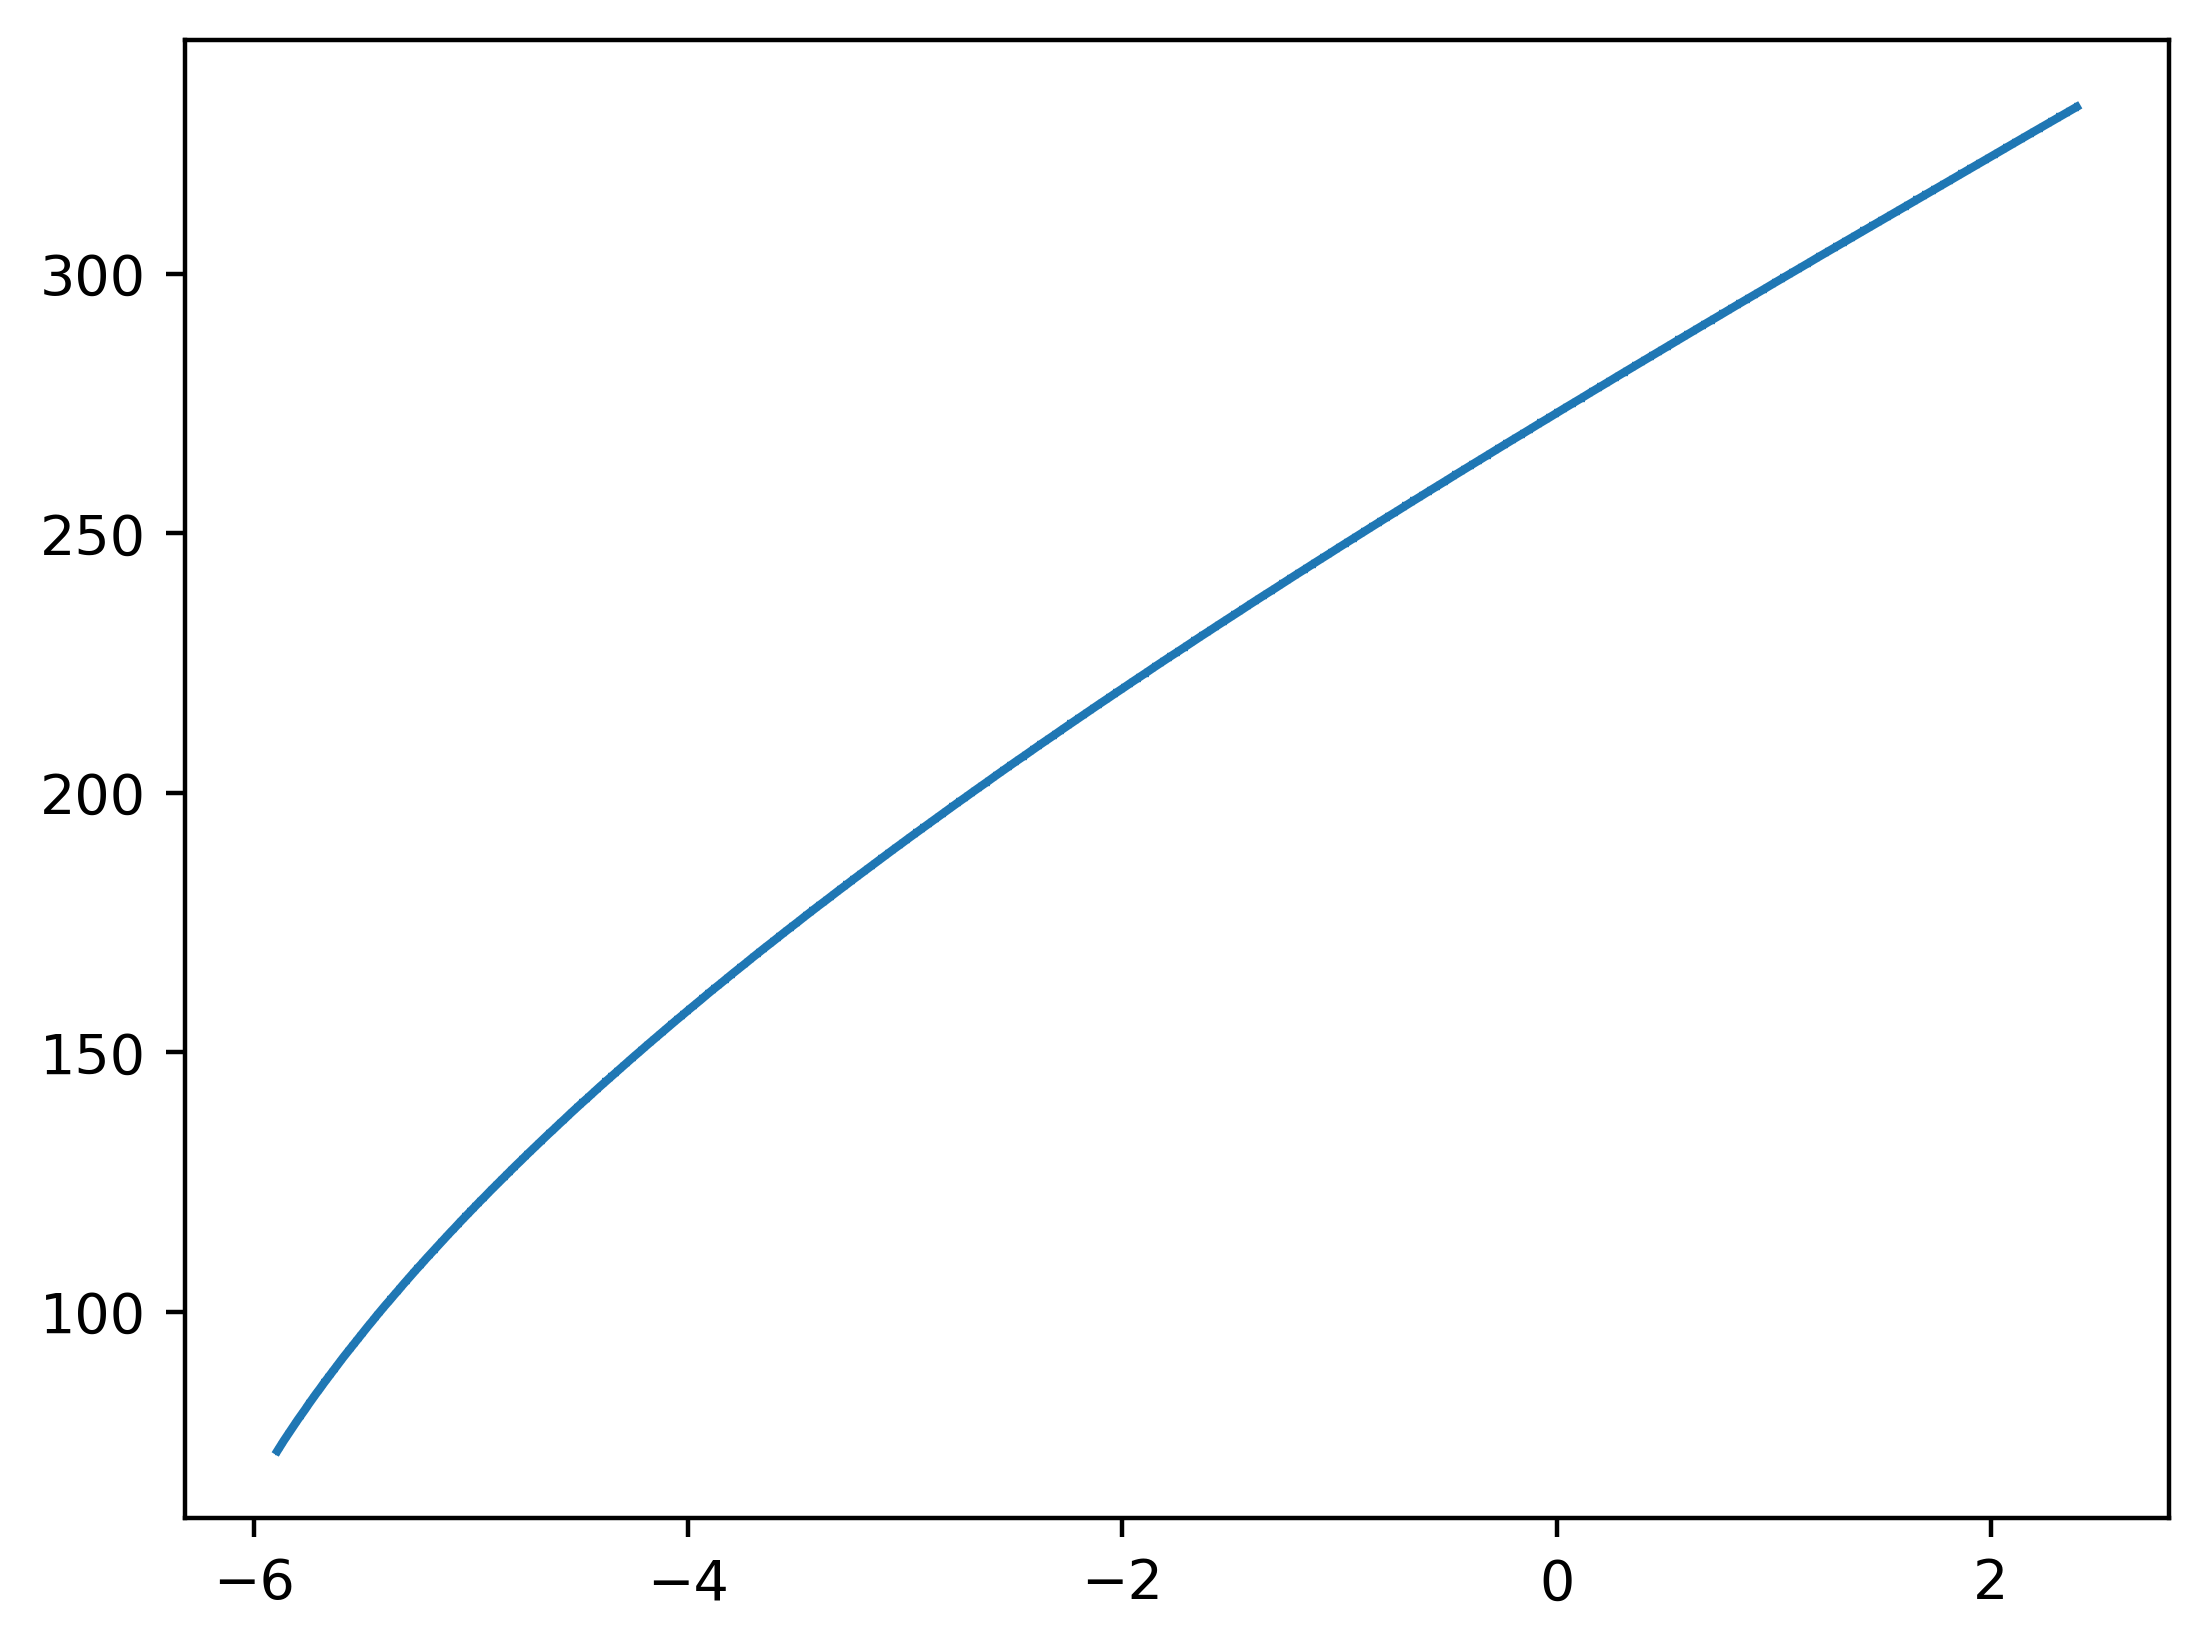

In [17]:
data = pd.read_csv('params/calibration.csv')
data['T'] += 273.15
xerr = 0.01
plt.errorbar(data['U'],data['T'],xerr=xerr)
plt.gcf().set_dpi(400)
plt.show()

In [18]:
def T(U):
    lower = data[data['U']<U].iloc[-1]
    upper = data[data['U']>U].iloc[0]
    temp = lower['T'] + (U-lower['U'])*(upper['T']-lower['T'])/(upper['U']-lower['U'])
    return temp

### Aufgabe 2.3: Korrektur des Wärmegangs

Trotz Wärmeisolation nimmt der für die Messung verwendete Aluminium-Hohlzylinder im Verlauf der Messung zusätzlich zur elektrischen Heizleistung Wärme aus der Umgebung auf (**Wärmegang**). 

 * Sie könnten den Wärmegang durch eine zweite, gleichartige Messung, ohne elektrische Heizung abschätzen (**Nullmessung**) und korrigieren. Eine solche Messung dauert allerdings $24$ Stunden, sie lässt sich also nicht an einem Versuchstag durchführen. 
 * Sie können stattdessen die Daten aus der Datei [waermegang.csv](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Spezifische_Waermekapazitaet/params/waermegang.csv) für diese Korrektur verwenden. 

---

$T_{0}(t)=\alpha+\beta\,e^{t/\gamma}$

In [19]:
langzeit = pd.read_csv('params/waermegang.csv')
langzeit['T'] = langzeit['U'].apply(T)

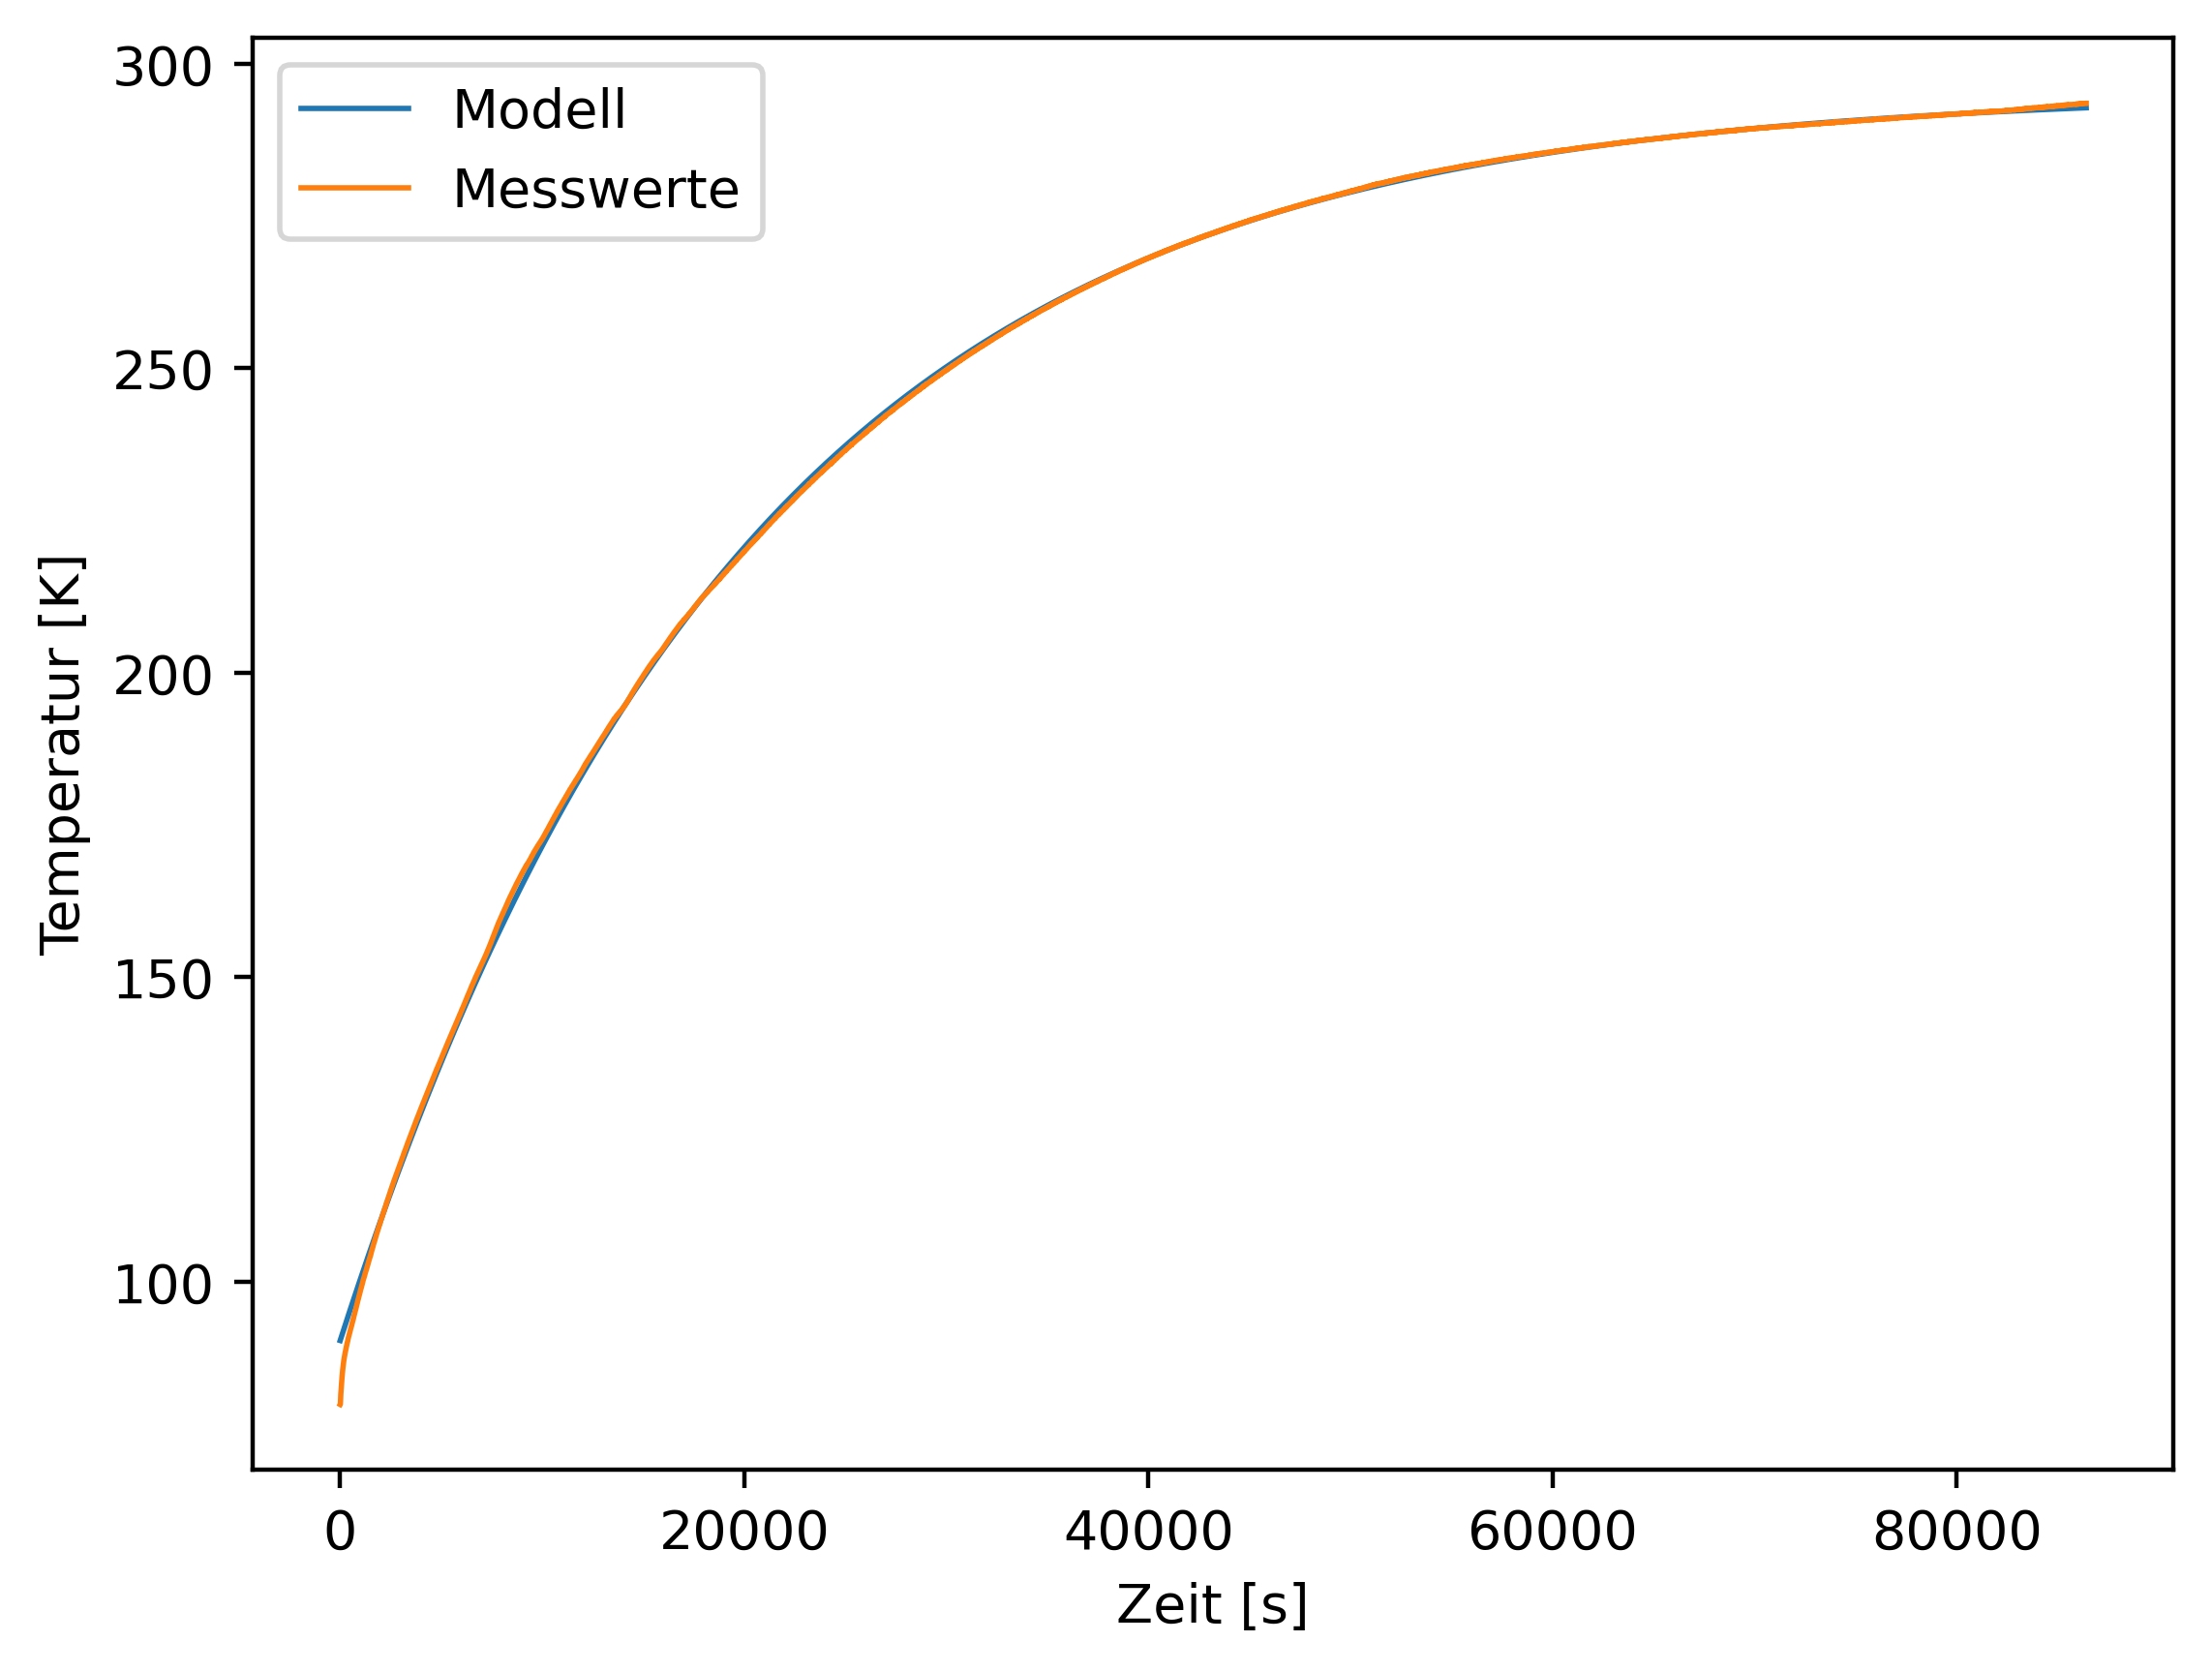

array([   295.41279977,   -205.05200521, -19828.21017011])

In [20]:
def modell(t,a,b,y):
    return a + b * np.exp(t/y)

guess = np.array([300,-200,-20000]) # Schätzung Aufgrund der Form des Graphens

val, cov = curve_fit(modell,langzeit['t'].values,langzeit['T'].values,p0=guess)
aerr,berr,yerr = np.sqrt(np.diag(cov))
#chi_2 = (modell(langzeit['t'],*val)-langzeit['T'])**2

plt.plot(langzeit['t'],modell(langzeit['t'],*val),label='Modell',lw = 1)
plt.plot(langzeit['t'],langzeit['T'],label='Messwerte',lw = 1)
plt.legend()
plt.xlabel('Zeit [s]')
plt.ylabel('Temperatur [K]')
plt.gcf().set_dpi(400)
plt.show()
val

### Aufgabe 2.4: Bestimmung von $c_{\mathrm{Al}}(T)$

 * Bestimmen Sie den Verlauf der spezifischen Wärmekapazität von Aluminium als Funktion von $T$. 
 * Bestimmen Sie aus diesem Verlauf den Wert für $T=20^{\circ}\mathrm{C}$ und vergleichen Sie mit Ihrer Erwartung.
 * Bestimmen Sie aus diesem Verlauf den Wert für $T_{\mathrm{Mix}}$ und vergleichen Sie mit dem Ergebnis aus **Aufgabe 1.2**.
 
---

**Lösung:**

*Fügen Sie Ihre Lösung zu dieser Aufgabe hier ein. Löschen Sie hierzu diesen kursiv gestellten Text aus dem Dokument. Um Code-Fragmente und Skripte in [Python](https://www.python.org/), sowie ggf. bildliche Darstellungen direkt ins [Jupyter notebook](https://jupyter.org/) einzubinden fügen Sie dem notebook eine Code-Zelle zu.* 

---